In [4]:
import pandas as pd
import numpy as np
import re


In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer


ModuleNotFoundError: No module named 'sklearn'

In [143]:
import matplotlib.ticker as ticker
import seaborn as sns
import matplotlib.pyplot as plt


In [162]:
%cd /content/drive/MyDrive/final project/MarketApp

/content/drive/MyDrive/final project/MarketApp


In [167]:
%cd /content/drive/MyDrive/final project/MarketApp/NLP
!rm -rf MarketApp
!git clone https://github.com/kbofosutuffour/MarketApp.git


/content/drive/MyDrive/final project/MarketApp/NLP
Cloning into 'MarketApp'...
remote: Enumerating objects: 2970, done.
remote: Counting objects: 100% (210/210), done.
remote: Compressing objects: 100% (92/92), done.
remote: Total 2970 (delta 111), reused 199 (delta 107), pack-reused 2760
Receiving objects: 100% (2970/2970), 288.98 MiB | 11.79 MiB/s, done.
Resolving deltas: 100% (2056/2056), done.
Updating files: 100% (616/616), done.


In [ ]:
!apt-get install git


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.10).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [158]:
!git pull


Already up to date.


In [170]:
!git config --global user.email "jrhee01@wm.edu"
!git config --global user.name "jrhee122"


In [171]:
!git status

Refresh index: 100% (524/524), done.
On branch nlp-presentation
Your branch is ahead of 'origin/nlp-presentation' by 9 commits.
  (use "git push" to publish your local commits)

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   NLP_Final_Project.ipynb
	modified:   ../marketapp_mobile/Chats.tsx

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	../MarketApp/

no changes added to commit (use "git add" and/or "git commit -a")


In [180]:
!git add .
!git commit -m "NLP_Final_Project.ipynb"
!git push "https://github.com/kbofosutuffour/MarketApp.git"

[nlp-presentation 4ec4bd3] NLP_Final_Project.ipynb
 1 file changed, 1 insertion(+), 1 deletion(-)
 rewrite NLP/NLP_Final_Project.ipynb (81%)
fatal: could not read Username for 'https://github.com': No such device or address


In [179]:

!git checkout nlp-presentation

M	NLP/NLP_Final_Project.ipynb
M	marketapp_mobile/Chats.tsx
Already on 'nlp-presentation'


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/final project/MarketApp/NLP/preprocessed_amazon.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df

,Category,Product Title,Product Description,Price,Conditions,Description Length
0,Skin Care | Lee Posh,Lee posh Lactic Acid 60% Anti ageing Pigmenta...,PROFESSIONAL GRADE Face Peel: this peel stimul...,11.19,Very bad,325
1,Skin Care | Generic,Generic 1 Pc brand snail eye cream remove dar...,"Use: eye, item type: cream, net wt: 20g, gzzz:...",14.59,Very good,510
2,Skin Care | Generic,Generic Anti Snoring Snore Stopper Sleep Apne...,Prevent the tongue from dropping backward or b...,19.59,New,438
3,Grocery & Gourmet Foods | Harveys,Harveys Crunchy & Creame Gourmet Delicacies C...,Harvey's wafer Cream Wafer 110g. Made in Country3,7.98,New,49
4,Skin Care | ShiKai,"Shikai Borage Dry Skin Therapy Foot Cream, 4....","Package Quantity:3 Contains borage oil, clinic...",74.82,Good,187
...,...,...,...,...,...,...
23061,Fragrance | Dove,Dove Men + Care Cool Silver Antiperspirant De...,Size:Pack of 4 Dove Men + Care Antiperspirant ...,32.91,Bad,90
23062,Bath & Shower | Dermasolve,Dermasolve Psoriasis Body Wash 8.0 Oz,Use before showering to help soften the scales...,60.12,Very good,586
23063,Skin Care | Pure Organics,Pure Organics Skin Lightening Mild Face Scrub...,For a smooth & Flawless complexion this scrub ...,3.14,Bad,379
23064,Skin Care | YASHUS,Yashus Moisturizing Anti-aging Gold Collagen ...,Gold eye mask is suitable for people: Eye patt...,14.70,Bad,417


In [ ]:
df['Product Description']

0        PROFESSIONAL GRADE Face Peel: this peel stimul...
1        Use: eye, item type: cream, net wt: 20g, gzzz:...
2        Prevent the tongue from dropping backward or b...
3        Harvey's wafer Cream Wafer 110g. Made in Country3
4        Package Quantity:3 Contains borage oil, clinic...
                               ...                        
23061    Size:Pack of 4 Dove Men + Care Antiperspirant ...
23062    Use before showering to help soften the scales...
23063    For a smooth & Flawless complexion this scrub ...
23064    Gold eye mask is suitable for people: Eye patt...
23065    With 2.5% active Retinol, Hyaluronic Acid, Vit...
Name: Product Description, Length: 23066, dtype: object

In [ ]:
#check null values
df['Product Title'].isnull().sum()
df['Product Description'].isnull().sum()
df['Price'].isnull().sum()
df['Category'].isnull().sum()


0

In [ ]:
# checking distribution of the "Category" column
df_1 = df.copy()
df_1['Category'] = df_1['Category'].str.split(' | ').str[0]
df_1
print(df_1['Category'].value_counts())

,Category,Product Title,Product Description,Price,Conditions,Description Length
0,Skin,Lee posh Lactic Acid 60% Anti ageing Pigmenta...,PROFESSIONAL GRADE Face Peel: this peel stimul...,11.19,Very bad,325
1,Skin,Generic 1 Pc brand snail eye cream remove dar...,"Use: eye, item type: cream, net wt: 20g, gzzz:...",14.59,Very good,510
2,Skin,Generic Anti Snoring Snore Stopper Sleep Apne...,Prevent the tongue from dropping backward or b...,19.59,New,438
3,Grocery,Harveys Crunchy & Creame Gourmet Delicacies C...,Harvey's wafer Cream Wafer 110g. Made in Country3,7.98,New,49
4,Skin,"Shikai Borage Dry Skin Therapy Foot Cream, 4....","Package Quantity:3 Contains borage oil, clinic...",74.82,Good,187
...,...,...,...,...,...,...
23061,Fragrance,Dove Men + Care Cool Silver Antiperspirant De...,Size:Pack of 4 Dove Men + Care Antiperspirant ...,32.91,Bad,90
23062,Bath,Dermasolve Psoriasis Body Wash 8.0 Oz,Use before showering to help soften the scales...,60.12,Very good,586
23063,Skin,Pure Organics Skin Lightening Mild Face Scrub...,For a smooth & Flawless complexion this scrub ...,3.14,Bad,379
23064,Skin,Yashus Moisturizing Anti-aging Gold Collagen ...,Gold eye mask is suitable for people: Eye patt...,14.70,Bad,417


In [ ]:
#checking distribution of products
product_counts = df_1['Product Title'].value_counts()

print(product_counts)

Product Title
 Xplus Bath Loofah(Pack of 3)                                                                                                                                                       39
 Bogatchi Chocolate Gift Box, Happy Diwali Chocolate, Diwali Chocolate Gifts, Diwali Chocolate Gift, Diwali Chocolate Bar, Diwali Gifts, 15 Pieces                                  16
 Xplus Bath Loofah                                                                                                                                                                  11
 Bogatchi Chocolate Gift Box, 15 Pieces                                                                                                                                              5
 CANDYCORNER "Happy Rakshabandhan " ( 9 CHOCOLATE BOX ) - with Love You Bhai | rakshabandhan gift for brother | rakhi gift for sister | gift for rakshabandhan | gift for rakhi      5
                                                                       

In [ ]:
df_1

,Category,Product Title,Product Description,Price,Conditions,Description Length
0,Skin,Lee posh Lactic Acid 60% Anti ageing Pigmenta...,PROFESSIONAL GRADE Face Peel: this peel stimul...,11.19,Very bad,325
1,Skin,Generic 1 Pc brand snail eye cream remove dar...,"Use: eye, item type: cream, net wt: 20g, gzzz:...",14.59,Very good,510
2,Skin,Generic Anti Snoring Snore Stopper Sleep Apne...,Prevent the tongue from dropping backward or b...,19.59,New,438
3,Grocery,Harveys Crunchy & Creame Gourmet Delicacies C...,Harvey's wafer Cream Wafer 110g. Made in Country3,7.98,New,49
4,Skin,"Shikai Borage Dry Skin Therapy Foot Cream, 4....","Package Quantity:3 Contains borage oil, clinic...",74.82,Good,187
...,...,...,...,...,...,...
23061,Fragrance,Dove Men + Care Cool Silver Antiperspirant De...,Size:Pack of 4 Dove Men + Care Antiperspirant ...,32.91,Bad,90
23062,Bath,Dermasolve Psoriasis Body Wash 8.0 Oz,Use before showering to help soften the scales...,60.12,Very good,586
23063,Skin,Pure Organics Skin Lightening Mild Face Scrub...,For a smooth & Flawless complexion this scrub ...,3.14,Bad,379
23064,Skin,Yashus Moisturizing Anti-aging Gold Collagen ...,Gold eye mask is suitable for people: Eye patt...,14.70,Bad,417


<Axes: xlabel='Category'>

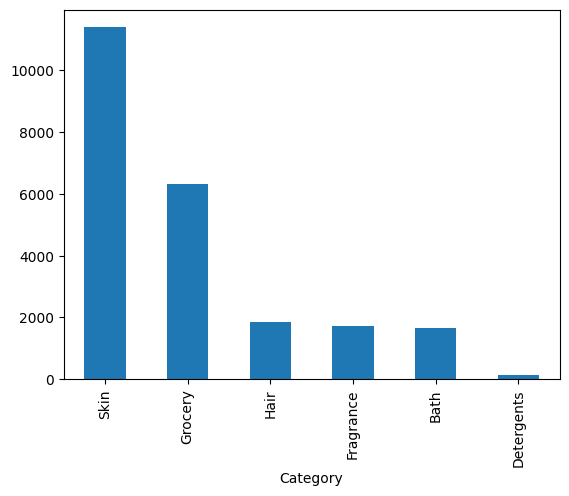

In [ ]:
# Replace commas in the 'Category' column
# df['Category'] = df['Category'].str.replace(',', '')
# make bar plot of the categories
df_1['Category'].value_counts().plot(kind='bar')

                                           Product Title  Name Length
0       Lee posh Lactic Acid 60% Anti ageing Pigmenta...           70
1       Generic 1 Pc brand snail eye cream remove dar...          136
2       Generic Anti Snoring Snore Stopper Sleep Apne...           89
3       Harveys Crunchy & Creame Gourmet Delicacies C...          116
4       Shikai Borage Dry Skin Therapy Foot Cream, 4....           72
...                                                  ...          ...
23061   Dove Men + Care Cool Silver Antiperspirant De...           73
23062             Dermasolve Psoriasis Body Wash 8.0 Oz            39
23063   Pure Organics Skin Lightening Mild Face Scrub...           53
23064   Yashus Moisturizing Anti-aging Gold Collagen ...           67
23065   Slss Anti Wrinkle Organic Hyaluronic Acid Vit...           94

[23066 rows x 2 columns]
count    23066.000000
mean        80.092257
std         37.019718
min          6.000000
25%         52.000000
50%         73.000000
75

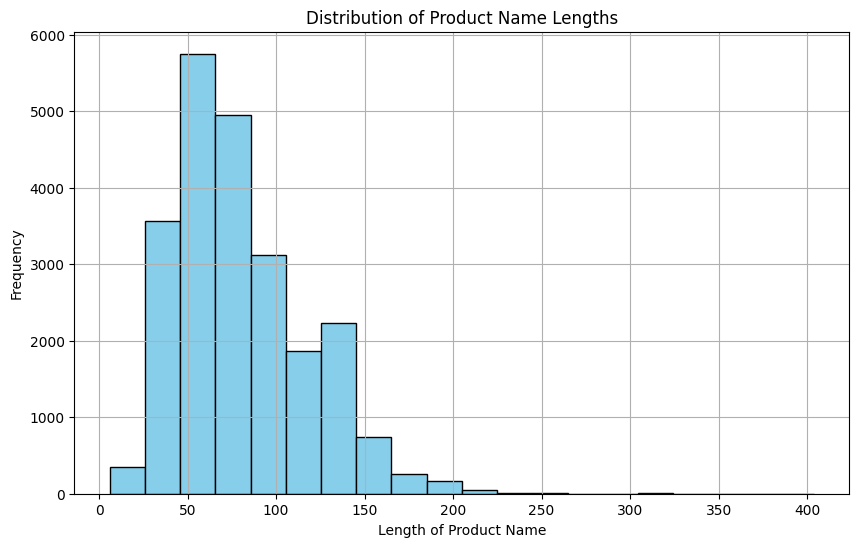

In [ ]:
df_1['Name Length'] = df_1['Product Title'].apply(len)
print(df_1[['Product Title', 'Name Length']])

description = df_1['Name Length'].describe()
print(description)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df_1['Name Length'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Product Name Lengths')
plt.xlabel('Length of Product Name')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [82]:
df

,Category,Product Title,Product Description,Price,Conditions,Description Length
0,Skin Care | Lee Posh,Lee posh Lactic Acid 60% Anti ageing Pigmenta...,PROFESSIONAL GRADE Face Peel: this peel stimul...,11.19,Very bad,325
1,Skin Care | Generic,Generic 1 Pc brand snail eye cream remove dar...,"Use: eye, item type: cream, net wt: 20g, gzzz:...",14.59,Very good,510
2,Skin Care | Generic,Generic Anti Snoring Snore Stopper Sleep Apne...,Prevent the tongue from dropping backward or b...,19.59,New,438
3,Grocery & Gourmet Foods | Harveys,Harveys Crunchy & Creame Gourmet Delicacies C...,Harvey's wafer Cream Wafer 110g. Made in Country3,7.98,New,49
4,Skin Care | ShiKai,"Shikai Borage Dry Skin Therapy Foot Cream, 4....","Package Quantity:3 Contains borage oil, clinic...",74.82,Good,187
...,...,...,...,...,...,...
23061,Fragrance | Dove,Dove Men + Care Cool Silver Antiperspirant De...,Size:Pack of 4 Dove Men + Care Antiperspirant ...,32.91,Bad,90
23062,Bath & Shower | Dermasolve,Dermasolve Psoriasis Body Wash 8.0 Oz,Use before showering to help soften the scales...,60.12,Very good,586
23063,Skin Care | Pure Organics,Pure Organics Skin Lightening Mild Face Scrub...,For a smooth & Flawless complexion this scrub ...,3.14,Bad,379
23064,Skin Care | YASHUS,Yashus Moisturizing Anti-aging Gold Collagen ...,Gold eye mask is suitable for people: Eye patt...,14.70,Bad,417


In [116]:
 #Tokenize product names using SpaCy
import spacy
import string

from tqdm import tqdm
tqdm.pandas()

punctuation = list(string.punctuation)
NLP = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

In [117]:
df_2=df.copy()

In [118]:
df_2

,Category,Product Title,Product Description,Price,Conditions,Description Length
0,Skin Care | Lee Posh,Lee posh Lactic Acid 60% Anti ageing Pigmenta...,PROFESSIONAL GRADE Face Peel: this peel stimul...,11.19,Very bad,325
1,Skin Care | Generic,Generic 1 Pc brand snail eye cream remove dar...,"Use: eye, item type: cream, net wt: 20g, gzzz:...",14.59,Very good,510
2,Skin Care | Generic,Generic Anti Snoring Snore Stopper Sleep Apne...,Prevent the tongue from dropping backward or b...,19.59,New,438
3,Grocery & Gourmet Foods | Harveys,Harveys Crunchy & Creame Gourmet Delicacies C...,Harvey's wafer Cream Wafer 110g. Made in Country3,7.98,New,49
4,Skin Care | ShiKai,"Shikai Borage Dry Skin Therapy Foot Cream, 4....","Package Quantity:3 Contains borage oil, clinic...",74.82,Good,187
...,...,...,...,...,...,...
23061,Fragrance | Dove,Dove Men + Care Cool Silver Antiperspirant De...,Size:Pack of 4 Dove Men + Care Antiperspirant ...,32.91,Bad,90
23062,Bath & Shower | Dermasolve,Dermasolve Psoriasis Body Wash 8.0 Oz,Use before showering to help soften the scales...,60.12,Very good,586
23063,Skin Care | Pure Organics,Pure Organics Skin Lightening Mild Face Scrub...,For a smooth & Flawless complexion this scrub ...,3.14,Bad,379
23064,Skin Care | YASHUS,Yashus Moisturizing Anti-aging Gold Collagen ...,Gold eye mask is suitable for people: Eye patt...,14.70,Bad,417


In [119]:
df_2['Text'] = df_2['Category'] + " | " + df_2['Product Title'] + " | " + df_2['Product Description'] + " | " + df_2['Price'].astype(str) + " | " + df_2['Conditions']


In [120]:
df_2['spacy_tokens'] = df_2['Text'].apply(lambda x: [token.text for token in NLP(x)])


In [121]:
df_2

,Category,Product Title,Product Description,Price,Conditions,Description Length,Text,spacy_tokens
0,Skin Care | Lee Posh,Lee posh Lactic Acid 60% Anti ageing Pigmenta...,PROFESSIONAL GRADE Face Peel: this peel stimul...,11.19,Very bad,325,Skin Care | Lee Posh | Lee posh Lactic Acid 6...,"[Skin, Care, |, Lee, Posh, |, , Lee, posh, La..."
1,Skin Care | Generic,Generic 1 Pc brand snail eye cream remove dar...,"Use: eye, item type: cream, net wt: 20g, gzzz:...",14.59,Very good,510,Skin Care | Generic | Generic 1 Pc brand snai...,"[Skin, Care, |, Generic, |, , Generic, 1, Pc,..."
2,Skin Care | Generic,Generic Anti Snoring Snore Stopper Sleep Apne...,Prevent the tongue from dropping backward or b...,19.59,New,438,Skin Care | Generic | Generic Anti Snoring Sn...,"[Skin, Care, |, Generic, |, , Generic, Anti, ..."
3,Grocery & Gourmet Foods | Harveys,Harveys Crunchy & Creame Gourmet Delicacies C...,Harvey's wafer Cream Wafer 110g. Made in Country3,7.98,New,49,Grocery & Gourmet Foods | Harveys | Harveys C...,"[Grocery, &, Gourmet, Foods, |, Harveys, |, ,..."
4,Skin Care | ShiKai,"Shikai Borage Dry Skin Therapy Foot Cream, 4....","Package Quantity:3 Contains borage oil, clinic...",74.82,Good,187,Skin Care | ShiKai | Shikai Borage Dry Skin T...,"[Skin, Care, |, ShiKai, |, , Shikai, Borage, ..."
...,...,...,...,...,...,...,...,...
23061,Fragrance | Dove,Dove Men + Care Cool Silver Antiperspirant De...,Size:Pack of 4 Dove Men + Care Antiperspirant ...,32.91,Bad,90,Fragrance | Dove | Dove Men + Care Cool Silve...,"[Fragrance, |, Dove, |, , Dove, Men, +, Care,..."
23062,Bath & Shower | Dermasolve,Dermasolve Psoriasis Body Wash 8.0 Oz,Use before showering to help soften the scales...,60.12,Very good,586,Bath & Shower | Dermasolve | Dermasolve Psori...,"[Bath, &, Shower, |, Dermasolve, |, , Dermaso..."
23063,Skin Care | Pure Organics,Pure Organics Skin Lightening Mild Face Scrub...,For a smooth & Flawless complexion this scrub ...,3.14,Bad,379,Skin Care | Pure Organics | Pure Organics Ski...,"[Skin, Care, |, Pure, Organics, |, , Pure, Or..."
23064,Skin Care | YASHUS,Yashus Moisturizing Anti-aging Gold Collagen ...,Gold eye mask is suitable for people: Eye patt...,14.70,Bad,417,Skin Care | YASHUS | Yashus Moisturizing Anti...,"[Skin, Care, |, YASHUS, |, , Yashus, Moisturi..."


In [122]:
df_2['Index']=df_2.index

In [123]:
random_seed = 42
sample = df_2.sample(n=1000, random_state=random_seed)
sample

sample = sample[['Index', 'Text']]
sample

,Index,Text
11117,11117,Grocery & Gourmet Foods | CHOCOCRAFT | Gift i...
4572,4572,Skin Care | ATOMY | Atomy Cream Sun Pa Sunscr...
1412,1412,"Fragrance | Linn Young | EDP 100ml.""Oui Je TA..."
167,167,Grocery & Gourmet Foods | CHOCOCRAFT | Karvac...
11253,11253,Grocery & Gourmet Foods | CHOCOCRAFT | CHOCOC...
...,...,...
16757,16757,Grocery & Gourmet Foods | TeaRaja | Tearaja A...
20479,20479,Grocery & Gourmet Foods | BOGATCHI | Bogatchi...
18209,18209,Grocery & Gourmet Foods | VY VedaYug | VY Ved...
20143,20143,"Hair Care | BioSilk | Biosilk Silk Therapy, 2..."


In [124]:
# Load spaCy model
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# Update regex pattern to include hyphens explicitly
pattern = re.compile('[\W_\-]+')  # Including hyphen explicitly

# Function to clean tokens
def clean_tokens(text):
    # Process the text
    doc = nlp(text)
    # Filter tokens using regex, check if alphabetic, and exclude stopwords
    cleaned_tokens = [
        pattern.sub('', token.lemma_).lower()
        for token in doc
        if pattern.sub('', token.lemma_).isalpha() and not token.is_stop
    ]
    return cleaned_tokens

# Apply function
sample['cleaned_tokens'] = sample['Text'].apply(clean_tokens)

# Display results
print(sample[['Text', 'cleaned_tokens']])

                                                    Text  \
11117  Grocery & Gourmet Foods | CHOCOCRAFT |  Gift i...   
4572   Skin Care | ATOMY |  Atomy Cream Sun Pa Sunscr...   
1412   Fragrance | Linn Young |  EDP 100ml."Oui Je TA...   
167    Grocery & Gourmet Foods | CHOCOCRAFT |  Karvac...   
11253  Grocery & Gourmet Foods | CHOCOCRAFT |  CHOCOC...   
...                                                  ...   
16757  Grocery & Gourmet Foods | TeaRaja |  Tearaja A...   
20479  Grocery & Gourmet Foods | BOGATCHI |  Bogatchi...   
18209  Grocery & Gourmet Foods | VY VedaYug |  VY Ved...   
20143  Hair Care | BioSilk |  Biosilk Silk Therapy, 2...   
2173   Bath & Shower | Mehron |  Mehron "MiniPro" Stu...   

                                          cleaned_tokens  
11117  [grocery, gourmet, foods, chococraft, gift, id...  
4572   [skin, care, atomy, atomy, cream, sun, pa, sun...  
1412   [fragrance, linn, young, edp, oui, je, taime, ...  
167    [grocery, gourmet, foods, chococraft

In [125]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english')


In [127]:
# Fit on our model
vectors = tfidf_vectorizer.fit_transform(sample['Text'])

In [128]:
# example output
vectors.shape

(1000, 6890)

In [129]:
# Create dataframe with terms and tfidf
tfidf_df = pd.DataFrame(vectors.toarray(),
                        index=sample.index.values,
                        columns=tfidf_vectorizer.get_feature_names_out()
                        )
# Explore some selected terms

tfidf_df


,00,000,001,0013,0033118,006607,0068,00802,01,015kg,...,различные,размер,розовый,советы,супер,тип,украшения,формы,цветов,яркий
11117,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4572,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1412,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
167,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11253,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16757,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20479,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18209,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20143,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [130]:
# Let's create a heatmap of higest terms in some of the documents

tfidf_df = (tfidf_df
            .stack()
            .reset_index()
            .rename(columns={0: 'tfidf', 'level_0': 'Index', 'level_1': 'term'})
           )

In [132]:
# Group the documents by their n highest performing terms

n = 5
top_tfidf = (tfidf_df
             .sort_values(by=['Index','tfidf'], ascending=[True,False])
             .groupby(['Index'])
             .head(n)
            )
top_tfidf

,Index,term,tfidf
5587525,35,vogue,0.617902
5587702,35,ximi,0.617902
5582447,35,cleanser,0.300844
5581568,35,aloe,0.267743
5583436,35,facial,0.214977
...,...,...,...
5645724,23053,frontier,0.635627
5645777,23053,garlic,0.405851
5645915,23053,granules,0.405851
5648277,23053,roasted,0.219446


In [110]:
pip install sentence_transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.5/171.5 kB 3.7 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

In [111]:
import numpy as np
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

model = SentenceTransformer('multi-qa-MiniLM-L6-cos-v1')
product_names = df['Product Title'].values
embeddings = model.encode(product_names, show_progress_bar=True)



/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/11.6k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/383 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/721 [00:00<?, ?it/s]

In [112]:

def recommend(query, product_names, embeddings, top_k=5):
    query_embedding = model.encode([query], show_progress_bar=False)
    similarities = cosine_similarity(query_embedding, embeddings).flatten()
    top_indices = np.argsort(similarities)[::-1][:top_k + 1]

    print("Top recommendations:")
    for index in top_indices[0:]:
        print(f"{product_names[index]} (Score: {similarities[index]:.4f})")

while True:
    user_input = input("Enter a product name to search for recommendations (or type 'exit' to quit): ")
    if user_input.lower() == 'exit':
        break
    recommend(user_input, product_names, embeddings, top_k=5)

Enter a product name to search for recommendations (or type 'exit' to quit): disney
Top recommendations:
 Disney Mickey Mouse & Friends Perfume Body Mist (Disney Mickey Mouse & Friends Perfume Body Mist)  (Score: 0.5203)
 Disney Witch Cornelia By Disney For Women. Eau De Toilette Spray 2.5 Ounces  (Score: 0.4930)
 Disney Pixar Finding Dory Bubbly Berry Scented Bubble Bath, 24 fl oz  (Score: 0.4609)
 Disney Witch Hay Lin By Disney For Women. Eau De Toilette Spray 2.5 OZ  (Score: 0.4382)
 ZIA Fantasia Special Malaysian Edition Perfume.  (Score: 0.3907)
 Nayab Camel Milk Mickey (Ylang Ylang)  (Score: 0.3472)
Enter a product name to search for recommendations (or type 'exit' to quit): aloe
Top recommendations:
 Bello Aloe vera Gel  (Score: 0.6902)
 Generic aloe: Novelty creative Fruit shape hand cream Moisturizing Nourishing Anti-chapping hand skin care beauty maquiagem 1pcs peach scent  (Score: 0.6607)
 EO Body Lotion Lavender + Aloe  (Score: 0.6605)
 Aloevera shampoo  (Score: 0.6421)
 Al

In [113]:
!pip install faiss-cpu


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.0/27.0 MB 24.6 MB/s eta 0:00:00


In [114]:
import faiss
import numpy as np
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('multi-qa-MiniLM-L6-cos-v1')
product_names = df['Product Title'].values
embeddings = model.encode(product_names, show_progress_bar=True).astype('float32')
index = faiss.IndexFlatL2(embeddings.shape[1])
index.add(embeddings)


Batches:   0%|          | 0/721 [00:00<?, ?it/s]

In [126]:
def recommend(query, index, product_names, top_k=5):
    query_embedding = model.encode([query], show_progress_bar=False).astype('float32')
    query_embedding = query_embedding.reshape(1, -1)
    distances, indices = index.search(query_embedding, top_k + 1)
    print("Top recommendations:")
    for i, idx in enumerate(indices[0][0:]):
        print(f"{i + 1}: {product_names[idx]} (Score: {1 - distances[0][i]})")

while True:
    user_input = input("Enter a product name to search for recommendations (or type 'exit' to quit): ")
    if user_input.lower() == 'exit':
        break
    recommend(user_input, index, product_names, top_k=5)


Enter a product name to search for recommendations (or type 'exit' to quit): disney
Top recommendations:
1:  Disney Mickey Mouse & Friends Perfume Body Mist (Disney Mickey Mouse & Friends Perfume Body Mist)  (Score: 0.04063618183135986)
2:  Disney Witch Cornelia By Disney For Women. Eau De Toilette Spray 2.5 Ounces  (Score: -0.013941526412963867)
3:  Disney Pixar Finding Dory Bubbly Berry Scented Bubble Bath, 24 fl oz  (Score: -0.07822108268737793)
4:  Disney Witch Hay Lin By Disney For Women. Eau De Toilette Spray 2.5 OZ  (Score: -0.12370002269744873)
5:  ZIA Fantasia Special Malaysian Edition Perfume.  (Score: -0.21851205825805664)
6:  Nayab Camel Milk Mickey (Ylang Ylang)  (Score: -0.3055613040924072)
Enter a product name to search for recommendations (or type 'exit' to quit): aloe
Top recommendations:
1:  Bello Aloe vera Gel  (Score: 0.3804125189781189)
2:  Generic aloe: Novelty creative Fruit shape hand cream Moisturizing Nourishing Anti-chapping hand skin care beauty maquiagem 1p